## QUESTION (1) Perform Exploratory data analysis
These will be done step by step as follows below;

In [1]:
import pandas as pd
data = pd.read_csv("cancer.csv")
data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   Year             305 non-null    int64
 2   Auxillary nodes  305 non-null    int64
 3   Survival         305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [3]:
## summary statistics
data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<AxesSubplot:>

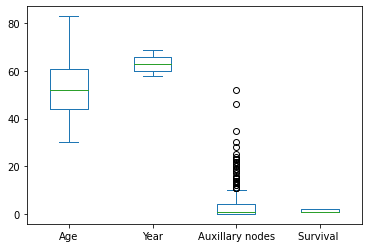

In [4]:
## Box plot
data.plot.box()

<AxesSubplot:>

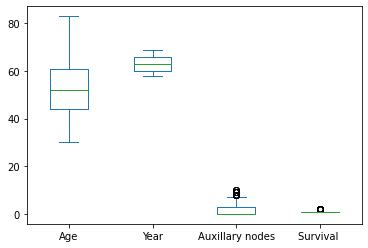

In [5]:
## Removing outliers
## max = 75% + 1.5* (75% - 25%)
maximum = 4.0 + 1.5* (4.0 - 0.0)
new_data = data[data["Auxillary nodes"] <= maximum]
new_data.plot.box()

In [6]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              265 non-null    int64
 1   Year             265 non-null    int64
 2   Auxillary nodes  265 non-null    int64
 3   Survival         265 non-null    int64
dtypes: int64(4)
memory usage: 10.4 KB
None


## Q1a What can you conclude from methods of central tendency and deviation of
## the variables?
From the above the given data, after carrying out the summary statistics it shows that the variable values were not that far apart (i.e in millions or thousands) but the values for Auxillary node was lower than the values for Age and Year which may need to be normalized or standardized to make sure all variable have equall imparts.
Then also using the box plot to conclude that it showed that the Auxillary node variable contained outliers.

In [7]:
## correlation because
corr = new_data.corr()
corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


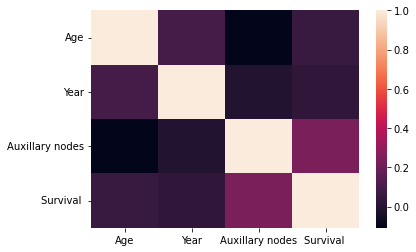

In [8]:
## visualization of correlated variables
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr)
plt.show()

## 1b) Are there any correlated variables?
From the above the given data there were no obvious correlated variables and also concluded after checking the heat map.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

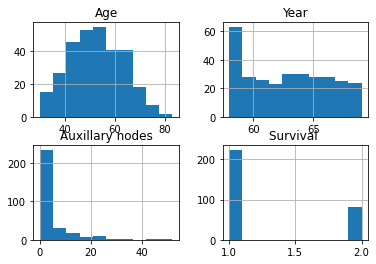

In [9]:
## skewness
data.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

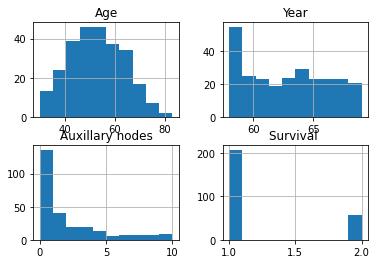

In [10]:
new_data.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

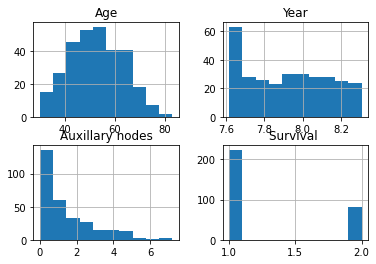

In [11]:
## Removing skewness
data["Year"] = data["Year"]**(0.5)
data["Auxillary nodes"] = data["Auxillary nodes"]**(0.5)
data.hist()

C:\Users\bolade\AppData\Local\Temp/ipykernel_3340/3204500282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Year"] = new_data["Year"]**(0.5)
C:\Users\bolade\AppData\Local\Temp/ipykernel_3340/3204500282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Auxillary nodes"] = new_data["Auxillary nodes"]**(0.5)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

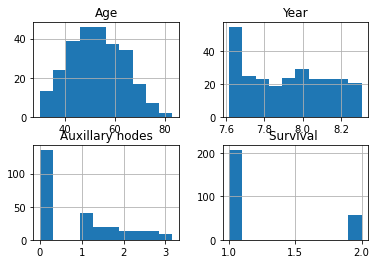

In [12]:
new_data["Year"] = new_data["Year"]**(0.5)
new_data["Auxillary nodes"] = new_data["Auxillary nodes"]**(0.5)
new_data.hist()

## Q1c) Interpret the skewness of the variables.
From the above given data we saw that there were skewness available for variables auxllary node and year.

In [13]:
## Standardization and Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [14]:
## Standardization for data
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled,columns = data.columns)
scaled_data


,Age,Year,Auxillary nodes,Survival
0,-2.100533,-0.249451,0.279453,-0.601338
1,-2.100533,0.669636,-0.854683,-0.601338
2,-2.007305,-1.191056,0.071335,-0.601338
3,-2.007305,0.669636,0.454905,-0.601338
4,-1.820849,-1.510223,1.215957,-0.601338
...,...,...,...,...
300,2.094725,-0.249451,-0.199889,-0.601338
301,2.187953,1.270619,-0.854683,-0.601338
302,2.281181,0.669636,0.279453,-0.601338
303,2.374409,0.669636,-0.199889,1.662959


In [15]:
## Standardization for new_data
scaler = StandardScaler()
scaler.fit(new_data)
scaled = scaler.fit_transform(new_data)
scaled_new_data = pd.DataFrame(scaled,columns = new_data.columns)
scaled_new_data

,Age,Year,Auxillary nodes,Survival
0,-2.078151,-0.246077,0.887830,-0.529333
1,-2.078151,0.669605,-0.855899,-0.529333
2,-1.986534,-1.184194,0.567850,-0.529333
3,-1.986534,0.669605,1.157586,-0.529333
4,-1.803300,-1.502178,2.327700,-0.529333
...,...,...,...,...
260,2.044615,-0.246077,0.150843,-0.529333
261,2.136233,1.268362,-0.855899,-0.529333
262,2.227850,0.669605,0.887830,-0.529333
263,2.319467,0.669605,0.150843,1.889171


In [16]:
## Normalization for data
scaler = MinMaxScaler()
scaler.fit(data)
scaled = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled,columns = data.columns)
scaled_data

,Age,Year,Auxillary nodes,Survival
0,0.000000,0.373792,0.240192,0.0
1,0.000000,0.646282,0.000000,0.0
2,0.018868,0.094626,0.196116,0.0
3,0.018868,0.646282,0.277350,0.0
4,0.056604,0.000000,0.438529,0.0
...,...,...,...,...
300,0.849057,0.373792,0.138675,0.0
301,0.867925,0.824461,0.000000,0.0
302,0.886792,0.646282,0.240192,0.0
303,0.905660,0.646282,0.138675,1.0


In [17]:
## Normalization for new_data
scaler = MinMaxScaler()
scaler.fit(new_data)
scaled = scaler.fit_transform(new_data)
scaled_new_data = pd.DataFrame(scaled,columns = new_data.columns)
scaled_new_data

,Age,Year,Auxillary nodes,Survival
0,0.000000,0.373792,0.547723,0.0
1,0.000000,0.646282,0.000000,0.0
2,0.018868,0.094626,0.447214,0.0
3,0.018868,0.646282,0.632456,0.0
4,0.056604,0.000000,1.000000,0.0
...,...,...,...,...
260,0.849057,0.373792,0.316228,0.0
261,0.867925,0.824461,0.000000,0.0
262,0.886792,0.646282,0.547723,0.0
263,0.905660,0.646282,0.316228,1.0


## 2. Develop Supervised learning models.

In [18]:
## import libries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [19]:
data = pd.read_csv("cancer.csv")
data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [20]:
# Create features/inputs
# Create the output/class
# Splitting into training and testing datasets
X = data.drop(columns = ["Survival "])
y = data["Survival "]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)
data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


              precision    recall  f1-score   support

           1       0.82      0.94      0.88        97
           2       0.45      0.20      0.28        25

    accuracy                           0.79       122
   macro avg       0.64      0.57      0.58       122
weighted avg       0.74      0.79      0.75       122



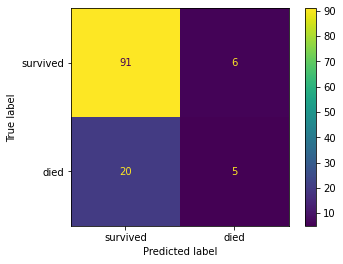

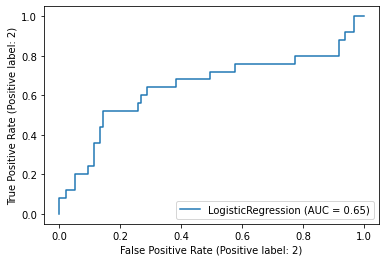

In [21]:
# Logistic Regression
lf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)
 
lf.score(X_test, y_test)

y_pred = lf.predict(X_test)

labels = ["survived", "died"]
cm = confusion_matrix(y_test, y_pred, labels = lf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot() 
print(classification_report(y_test, y_pred, labels = lf.classes_))
plot_roc_curve(lf, X_test, y_test) 
plt.show()

              precision    recall  f1-score   support

           1       0.83      0.91      0.87        97
           2       0.44      0.28      0.34        25

    accuracy                           0.78       122
   macro avg       0.63      0.59      0.60       122
weighted avg       0.75      0.78      0.76       122



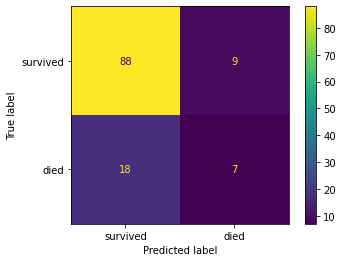

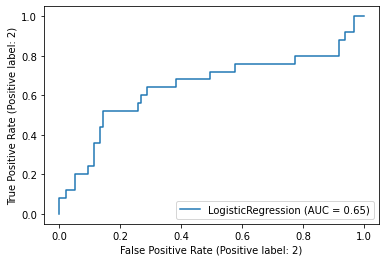

In [22]:
# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = lf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = lf.classes_))
plot_roc_curve(lf, X_test, y_test) 
plt.show()

              precision    recall  f1-score   support

           1       0.80      0.97      0.88        97
           2       0.40      0.08      0.13        25

    accuracy                           0.79       122
   macro avg       0.60      0.52      0.51       122
weighted avg       0.72      0.79      0.73       122



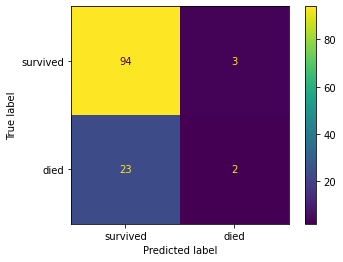

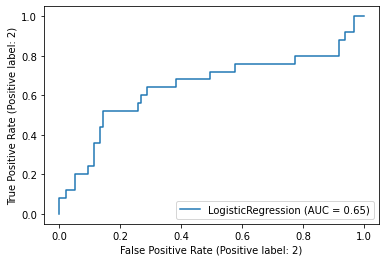

In [23]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "rbf", gamma = 1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = lf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = lf.classes_))
plot_roc_curve(lf, X_test, y_test) 
plt.show()

              precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           2       0.35      0.28      0.31        25

    accuracy                           0.75       122
   macro avg       0.59      0.57      0.58       122
weighted avg       0.73      0.75      0.73       122



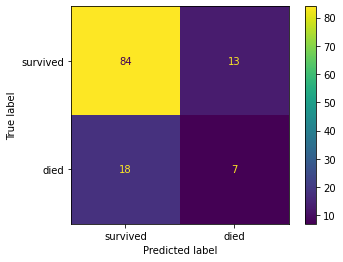

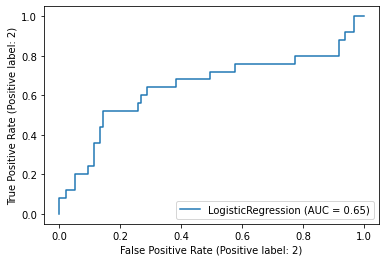

In [24]:
# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = lf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = lf.classes_))
plot_roc_curve(lf, X_test, y_test) 
plt.show()

## Compare the 4 methods based on the performance metrics and identify the best model for this problem.
After using the four(4) methods, we conclude, based on the performance, that the Logistic Regression was the best model for this problem.

## Implement k-fold cross validation

In [25]:
#  k-fold cross validation for Logistic Regression 
kf = KFold(n_splits=10)

Accuracy = []

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    lf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(lf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    Accuracy.append(lf.score(X_train.iloc[test_indices], y_train.iloc[test_indices]))  
    iteration += 1
Average_Accuracy = sum(Accuracy)/10
print(Average_Accuracy)
lf.score(X_test,y_test)

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.6666666666666666
0.7271929824561404


0.7786885245901639

## 3) Evaluate if the algorithms are overfitting?
Therefore it shows that there was more generalized and not overfitting for Logistic Regression

In [26]:
#  k-fold cross validation for random forest
kf = KFold(n_splits=10)

Accuracy = []
iteration = 1
for train_indices, test_indices in kf.split(X_train):
    rf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(rf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    Accuracy.append(rf.score(X_train.iloc[test_indices], y_train.iloc[test_indices]))  
    iteration += 1
    
Average_Accuracy = sum(Accuracy)/10
print(Average_Accuracy)
rf.score(X_test,y_test)

Accuracy for iteration 1 is 0.631578947368421
Accuracy for iteration 2 is 0.631578947368421
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.5555555555555556
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.7222222222222222
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.5555555555555556
Accuracy for iteration 10 is 0.7777777777777778
0.6728070175438596


0.7704918032786885

## 3) Evaluate if the algorithms are overfitting?
Therefore it shows that there was overfitting for random forest

In [27]:
#  k-fold cross validation for Support Vector Machine
kf = KFold(n_splits=10)

Accuracy = []

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    svm.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(svm.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    Accuracy.append(svm.score(X_train.iloc[test_indices], y_train.iloc[test_indices]))  
    iteration += 1
    
Average_Accuracy = sum(Accuracy)/10
print(Average_Accuracy)
svm.score(X_test,y_test)

Accuracy for iteration 1 is 0.5789473684210527
Accuracy for iteration 2 is 0.7368421052631579
Accuracy for iteration 3 is 0.6842105263157895
Accuracy for iteration 4 is 0.6666666666666666
Accuracy for iteration 5 is 0.6111111111111112
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7777777777777778
Accuracy for iteration 8 is 0.7222222222222222
Accuracy for iteration 9 is 0.6111111111111112
Accuracy for iteration 10 is 0.6666666666666666
0.6888888888888889


0.7868852459016393

## 3) Evaluate if the algorithms are overfitting?
Therefore it shows that there was overfitting for Support Vector Machine

In [28]:
#  k-fold cross validation for Neural Network
kf = KFold(n_splits=10)
Accuracy = []

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    nn.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(nn.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    Accuracy.append(nn.score(X_train.iloc[test_indices], y_train.iloc[test_indices]))  
    iteration += 1
    
Average_Accuracy = sum(Accuracy)/10
print(Average_Accuracy)
nn.score(X_test,y_test)

Accuracy for iteration 1 is 0.7894736842105263
Accuracy for iteration 2 is 0.6842105263157895


C:\Users\bolade\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy for iteration 3 is 0.5789473684210527
Accuracy for iteration 4 is 0.8333333333333334
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.7222222222222222
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.7777777777777778
0.7330409356725147


C:\Users\bolade\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7622950819672131

## 3) Evaluate if the algorithms are overfitting?
Therefore it shows that there was overfitting for Neural Network

## Use GridSearchCV for searching through hyper parameters

In [29]:
# Implement grid search for parameter tuning

In [30]:
#grid search for Support Logistic Regression

parameters = {'solver': ('newton-cg', 'lbfgs', 'liblinear','sag', 'saga'), 'penalty': ['none','l1', 'l2', 'elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01]}
lf_grid = GridSearchCV(lf, parameters)
lf_grid.fit(X_train, y_train)
lf_grid.best_params_

C:\Users\bolade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\bolade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\bolade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\bolade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\bolade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\bolade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting 

{'C': 100, 'penalty': 'none', 'solver': 'sag'}

In [37]:
#grid search for random forest

parameters = {'max_features': ('sqrt', 'log2'),'n_estimators': [10, 100, 1000],'max_depth':[1,20]}
rf_grid = GridSearchCV(rf, parameters)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 10}

In [ ]:
#grid search for Support Vector Machine

parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}
svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

In [45]:
#grid search for Neural Network

parameters = { 'solver': ('lbfgs', 'sgd', 'adam'), 'learning_rate': ('constant', 'invscaling', 'adaptive'), 'activation':('identity', 'logistic', 'tanh', 'relu')}
nn_grid = GridSearchCV(nn, parameters)
nn_grid.fit(X_train, y_train)
nn_grid.best_params_

C:\Users\bolade\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\bolade\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\bolade\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

{'activation': 'logistic', 'learning_rate': 'constant', 'solver': 'sgd'}

## 4) Develop a function which can implement machine learning.

In [34]:
def machine_learning(data, algorithm):
    fn = algorithm(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(data[0], data[1])
    fn.score(data[2], data[3])
    y_pred = fn.predict(data[2])
    labels = ["survived", "died"]
    cm = confusion_matrix(data[3], y_pred, labels = fn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
    disp.plot()
    print(classification_report(data[3], y_pred, labels = fn.classes_))
    plot_roc_curve(fn, data[2], data[3]) 
    plt.show()
    print ("data,logisticRegression")

              precision    recall  f1-score   support

           1       0.82      0.94      0.88        97
           2       0.45      0.20      0.28        25

    accuracy                           0.79       122
   macro avg       0.64      0.57      0.58       122
weighted avg       0.74      0.79      0.75       122



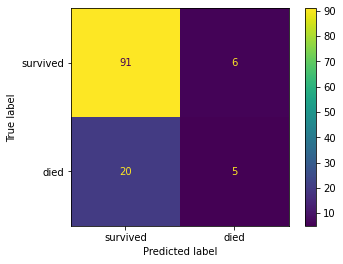

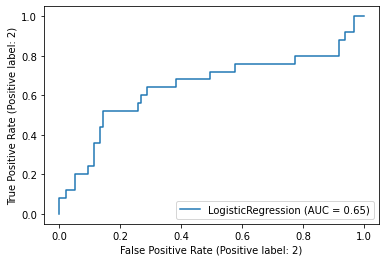

data,logisticticRegression


In [35]:
data = [X_train, y_train, X_test, y_test]
machine_learning(data, LogisticRegression)